# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: authentication.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('authentication.csv')
print(data.shape)
data.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Exploration

0    762
1    610
Name: Class, dtype: int64


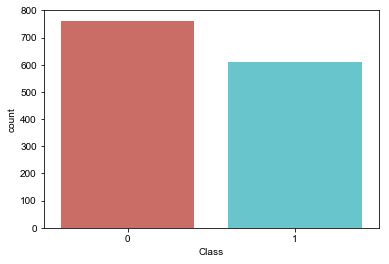

In [2]:
print(data['Class'].value_counts())

sns.countplot(x='Class',data = data, palette='hls',order = data['Class'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [3]:
data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

## Correlation

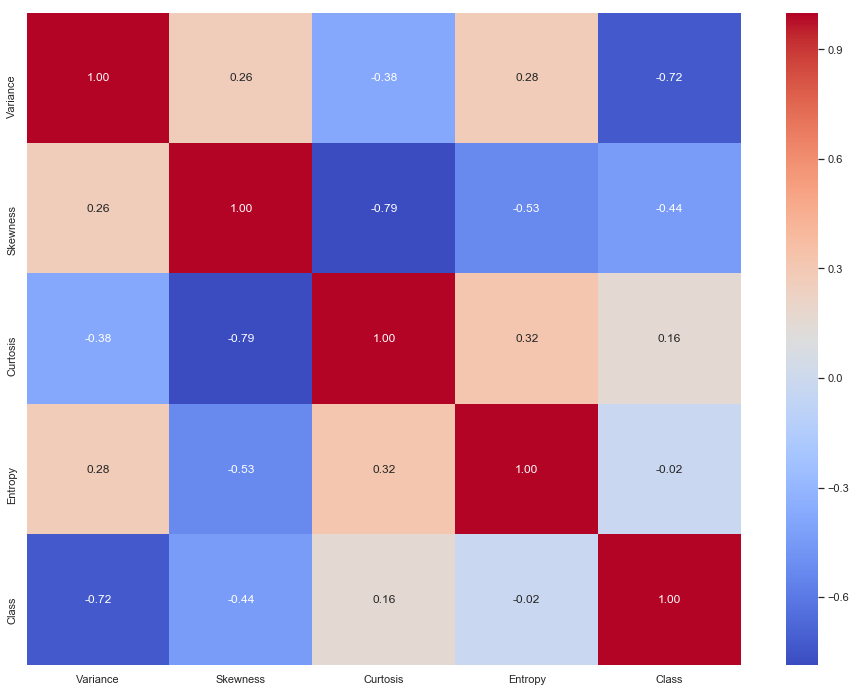

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["Class"].sort_values(ascending=False)

Class       1.000000
Curtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Class, dtype: float64

## Data Processing and Selection

In [6]:
X = data.iloc[:, 0:4].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1372, 4)


array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ]])

In [7]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1372,)


array([0, 0, 0, 0, 0], dtype=int64)

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1372, 4)


array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (960, 4) (960,)
X TEST Set :  (412, 4) (412,)


## Gradient Boosting Classifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : 1.0
Mean Absolute Error    : 0.0
Mean Squared Error     : 0.0
Root Mean Squared Error: 0.0
Accuracy               : 1.0
Precision              : 1.0
Recall                 : 1.0


## Data Prediction

In [11]:
df_pred1 = data[data.index == 50]
df_pred2 = data[data.index == 762]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Variance,Skewness,Curtosis,Entropy,Class
50,4.3239,-4.8835,3.4356,-0.5776,0
762,-1.3971,3.3191,-1.3927,-1.9948,1


In [12]:
Xhat = df_pred.iloc[:, 0:4].values
Xhat = scaler.transform(Xhat)

yhat = data.iloc[:, -1].values

In [13]:
GB_pred = gb.predict(Xhat)
GB_pred

array([0, 1], dtype=int64)